In [1]:
import cv2
import pandas as pd
import numpy as np
import os
import matplotlib as plt

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import (
    Conv2D, MaxPooling2D, BatchNormalization, Dropout, Dense,
    Flatten, Input
)

In [ ]:

def Imageprocess(dataset_path):
    data = []
    labels = []
    image_size = 48

    class_names = os.listdir(dataset_path)
    print(class_names)
    label_namesid= [0,1,2,3,4,5,6]
    print(label_namesid)

    for label, class_name in zip(label_namesid,class_names):
        class_folder = os.path.join(dataset_path, class_name)
        print(class_folder)
        for img_name in os.listdir(class_folder):
            img_path = os.path.join(class_folder, img_name)
            img = cv2.imread(img_path)

            if img is None:
                continue  # skip unreadable images

            img = cv2.resize(img, (image_size, image_size))
            data.append(img)
            labels.append(label)

    X = np.array(data)
    y= np.array(labels)

    print("Loaded images:", X.shape)
    print("Labels:", y.shape)
    return X,y

In [ ]:
X_train,y_train=Imageprocess("train")
X_test,y_test=Imageprocess("test")


In [ ]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)


In [ ]:
import numpy as np
import pandas as pd


X_train_gray = np.mean(X_train, axis=-1).astype(np.uint8)
X_test_gray  = np.mean(X_test, axis=-1).astype(np.uint8)


X_train_flat = X_train_gray.reshape((X_train_gray.shape[0], -1))   # (28709, 2304)
X_test_flat  = X_test_gray.reshape((X_test_gray.shape[0], -1))     # (7178, 2304)


# If labels are one-hot encoded (7 classes), convert to single class
y_train_labels = np.argmax(y_train, axis=1)   # (28709,)
y_test_labels  = np.argmax(y_test, axis=1)    # (7178,)


train_df = pd.DataFrame(X_train_flat)
train_df.insert(0, "label", y_train_labels)   # put label as first column
train_df.to_csv("train_dataset.csv", index=False)

test_df = pd.DataFrame(X_test_flat)
test_df.insert(0, "label", y_test_labels)
test_df.to_csv("test_dataset.csv", index=False)




In [2]:
train=pd.read_csv("train_dataset.csv")
test=pd.read_csv("test_dataset.csv")

In [3]:





y_train = train["label"].values
y_test  = test["label"].values


X_train = train.drop("label", axis=1).values   # shape (28709, 2304)
X_test  = test.drop("label", axis=1).values    # shape (7178, 2304)






In [4]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(28709, 2304)
(28709,)
(7178, 2304)
(7178,)


In [5]:
from tensorflow.keras.utils import to_categorical

y_train = to_categorical(y_train)

y_test = to_categorical(y_test)

In [6]:
X_train = X_train / 255.0  # Normalize pixel values

X_test = X_test / 255.0

In [7]:
print("X_train:", X_train.shape)
print("y_train:", y_train.shape)

X_train: (28709, 2304)
y_train: (28709, 7)


In [8]:
X_train = X_train.reshape(-1, 48, 48, 1)   # (28709, 48, 48, 1)
X_test  = X_test.reshape(-1, 48, 48, 1)

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, BatchNormalization

num_classes = 7  

model = Sequential([
    # Conv Block 1
    Conv2D(32, (3,3), activation='relu', input_shape=(48,48,1), padding='same'),
    BatchNormalization(),
    Conv2D(32, (3,3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2,2)),
    Dropout(0.25),

    # Conv Block 2
    Conv2D(64, (3,3), activation='relu', padding='same'),
    BatchNormalization(),
    Conv2D(64, (3,3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2,2)),
    Dropout(0.25),

    # Conv Block 3
    Conv2D(128, (3,3), activation='relu', padding='same'),
    BatchNormalization(),
    Conv2D(128, (3,3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2,2)),
    Dropout(0.25),

    # Fully Connected
    Flatten(),
    Dense(512, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),

    Dense(num_classes, activation='softmax')  
])

# Compile model
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.0005),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

model.summary()


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 48, 48, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 48, 48, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 48, 48, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 48, 48, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 24, 24, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 24, 24, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 24, 24, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 24, 24, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 24, 24, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 24, 24, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 12, 12, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 12, 12, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 12, 12, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 12, 12, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 12, 12, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 12, 12, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 6, 6, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 6, 6, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 4608)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼─────────────

 Total params: 2,653,671 (10.12 MB)

 Trainable params: 2,651,751 (10.12 MB)

 Non-trainable params: 1,920 (7.50 KB)

In [ ]:

history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),    
    epochs=50,
    batch_size=64,
    verbose=1
)



Epoch 1/50
449/449 ━━━━━━━━━━━━━━━━━━━━ 34s 41ms/step - accuracy: 0.2775 - loss: 2.3278 - val_accuracy: 0.3221 - val_loss: 1.7674
Epoch 2/50
449/449 ━━━━━━━━━━━━━━━━━━━━ 20s 17ms/step - accuracy: 0.4162 - loss: 1.5859 - val_accuracy: 0.4641 - val_loss: 1.3742
Epoch 3/50
449/449 ━━━━━━━━━━━━━━━━━━━━ 7s 17ms/step - accuracy: 0.4847 - loss: 1.3718 - val_accuracy: 0.5111 - val_loss: 1.2819
Epoch 4/50
449/449 ━━━━━━━━━━━━━━━━━━━━ 10s 17ms/step - accuracy: 0.5240 - loss: 1.2575 - val_accuracy: 0.5366 - val_loss: 1.2131
Epoch 5/50
449/449 ━━━━━━━━━━━━━━━━━━━━ 8s 17ms/step - accuracy: 0.5551 - loss: 1.1828 - val_accuracy: 0.5639 - val_loss: 1.1529
Epoch 6/50
449/449 ━━━━━━━━━━━━━━━━━━━━ 8s 17ms/step - accuracy: 0.5708 - loss: 1.1424 - val_accuracy: 0.5552 - val_loss: 1.1990
Epoch 7/50
449/449 ━━━━━━━━━━━━━━━━━━━━ 8s 17ms/step - accuracy: 0.5904 - loss: 1.0877 - val_accuracy: 0.5639 - val_loss: 1.1620
Epoch 8/50
449/449 ━━━━━━━━━━━━━━━━━━━━ 10s 17ms/step - accuracy: 0.6108 - loss: 1.0409 - val_

In [12]:
model.save("Train_model.h5")

In [19]:
print("Final Training Accuracy:", history.history['accuracy'][-1])
print("Final Validation Accuracy:", history.history['val_accuracy'][-1])


Final Training Accuracy: 0.921104907989502
Final Validation Accuracy: 0.6409863233566284


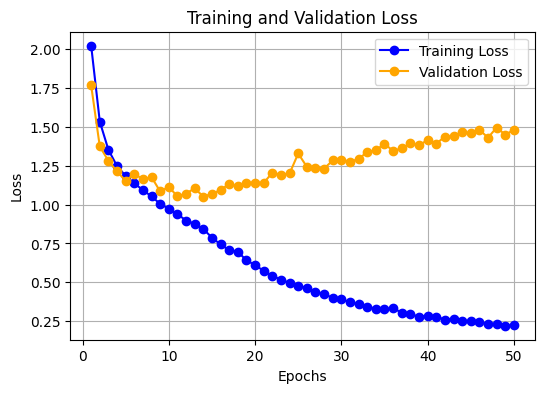

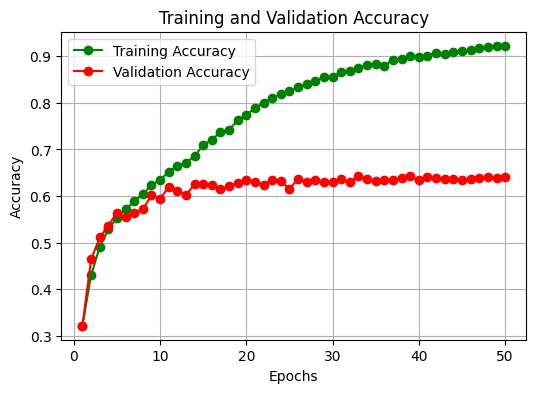

In [17]:
import matplotlib.pyplot as plt


loss     = history.history['loss']
val_loss = history.history['val_loss']
acc      = history.history['accuracy']
val_acc  = history.history['val_accuracy']
epochs   = range(1, len(loss) + 1)


plt.figure(figsize=(6,4))
plt.plot(epochs, loss, 'o-', color='blue', label='Training Loss')
plt.plot(epochs, val_loss, 'o-', color='orange', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(6,4))
plt.plot(epochs, acc, 'o-', color='green', label='Training Accuracy')
plt.plot(epochs, val_acc, 'o-', color='red', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()


225/225 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step
Classification Report (Emotions):
              precision    recall  f1-score   support

       Angry       0.54      0.56      0.55       958
     Disgust       0.84      0.55      0.66       111
        Fear       0.55      0.42      0.48      1024
       Happy       0.84      0.84      0.84      1774
         Sad       0.55      0.62      0.59      1233
    Surprise       0.50      0.55      0.52      1247
     Neutral       0.79      0.76      0.78       831

    accuracy                           0.64      7178
   macro avg       0.66      0.61      0.63      7178
weighted avg       0.64      0.64      0.64      7178

Accuracy: 0.6409863471719142


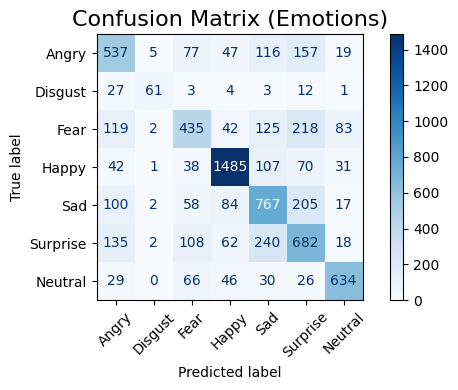

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, accuracy_score, ConfusionMatrixDisplay


y_pred_probs = model.predict(X_test)                      
y_pred_encoded = np.argmax(y_pred_probs, axis=1)          
y_test_encoded = np.argmax(y_test, axis=1)            


emotion_map = {
    0: "Angry",
    1: "Disgust",
    2: "Fear",
    3: "Happy",
    4: "Sad",
    5: "Surprise",
    6: "Neutral"
}
class_names = [emotion_map[i] for i in range(len(emotion_map))]

print("Classification Report (Emotions):")
print(classification_report(y_test_encoded, y_pred_encoded, target_names=class_names))


print("Accuracy:", accuracy_score(y_test_encoded, y_pred_encoded))


fig, ax = plt.subplots(figsize=(6, 4))
disp = ConfusionMatrixDisplay.from_predictions(
    y_test_encoded,
    y_pred_encoded,
    display_labels=class_names,
    ax=ax,
    cmap="Blues",
    xticks_rotation=45
)
disp.ax_.set_title("Confusion Matrix (Emotions)", fontsize=16)
plt.tight_layout()
plt.show()
